# Regression Analysis in Statsmodels - Lab

## Introduction

In the previous code along, we looked all the requirements for running an ols simple regression using statsmodels. We worked with a toy example to understand the process and all the necessary steps that must be performed. In this lab , we shall look at a slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, we will work with the "Advertising Dataset" which is a very popular dataset for studying simple regression. [The dataset is available at Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have already downloaded for you. It is available as "Advertising.csv". We shall use this dataset to ask ourselves a simple analytical question:

## The Question

Which advertising channel has a strong relationship with sales volume, and can be used to model and predict the sales. 

### Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Describe the contents of this dataset
Looks like there are 200 rows. There is an index in there that needs to be removed. I will verify all the data types are the same.

In [4]:
df.columns
df.drop(labels = 'Unnamed: 0',axis= 1, inplace=True) #This removed the column index that was just hanging out

In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Verified that they are float objs

In [7]:
plt.style.use('ggplot')

### Step 2: Plot histograms with kde overlay to check for the normality of the predictors

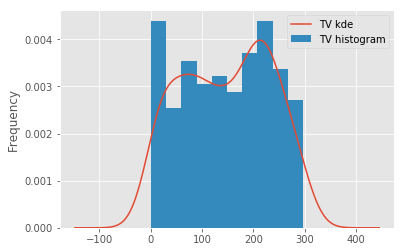

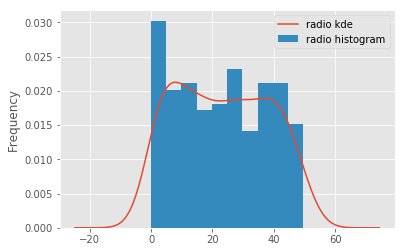

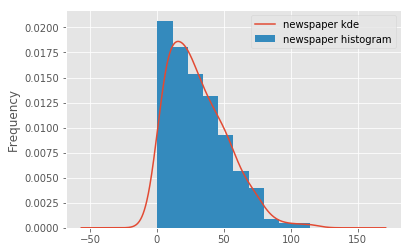

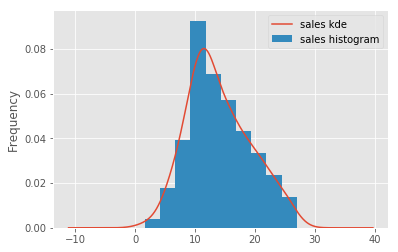

In [8]:
for column in df:
    
    df[column].plot.kde(label = column +' kde')
    df[column].plot.hist(density=True, label = column + ' histogram')
    plt.legend()
    plt.show()

In [9]:
# For all the variables, check if they hold normality assumption


# Record your observations on normality here 
It looks like sales is the only one that is normal'esk. Newspaper is skewed to the left, while TV and radio are more plateau shaped. The TV and radio are symetric so that means we can use it to predict.

#### Remember . Nothing is perfect . So be positive 
<img src="https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg" width=400>

### Step 3: Test for the linearity assumption. 
Use scatterplots to plot each predictor against the target variable

In [10]:
# visualize the relationship between the preditors and the target using scatterplots


No handles with labels found to put in legend.


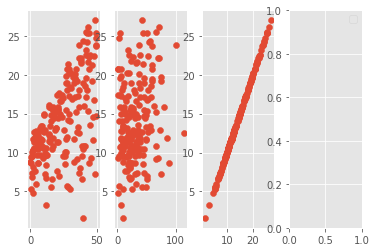

In [11]:
n = 1
for column in df:
    temp = df[column]
    plt.scatter(temp, df.sales, label = column)
    plt.subplot(1,4,n)
    n += 1
plt.legend()
plt.show()

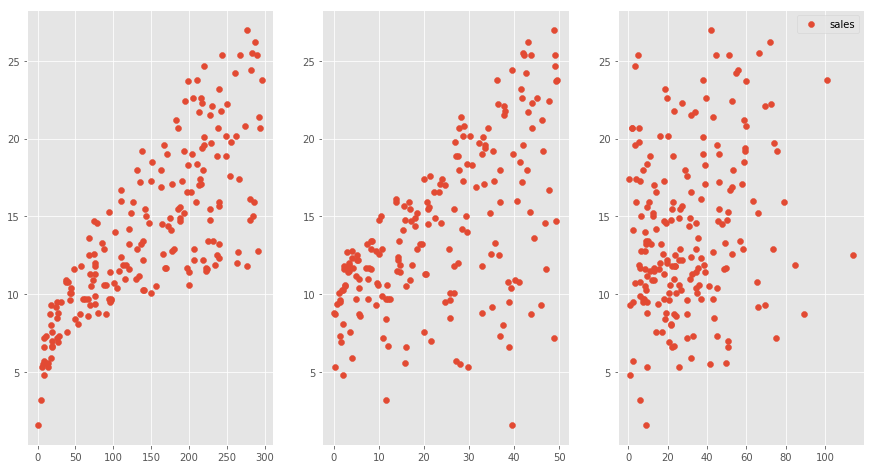

In [12]:
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
plt.scatter(df.TV, df.sales)

plt.subplot(1,3,2)
plt.scatter(df.radio, df.sales)

plt.subplot(1,3,3)
plt.scatter(df.newspaper, df.sales)

plt.legend()
plt.show()

# Record yor observations on linearity here 
Newspaper is non linear. The other two, radio and TV are more linear. TV is the most

### Conclusion so far !

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We shall move ahead with our analysis using TV and radio , and count out the newspaper due to the fact that data violates ols assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. We shall talk about this in the next section. 

### Step 4: Run a simple regression in `statsmodels` with TV as a predictor

In [16]:
# import libraries
import statsmodels.formula.api as smf
# build the formula 
f = 'sales~TV'
model = smf.ols(formula=f, data=df).fit()
model.summary()
# create a fitted model in one line


AssertionError: 

### Step 5: Get regression diagnostics summary


### Record your observations on "Goodness of fit"


Note here that the coefficients represent associations, not causations

R^2 looks good, more than .5 so that is promising.


### Step 6:  Draw a prediction line with data points omn a scatter plot for X (TV) and Y (Sales)

Hint: We can use `model.predict()` functions to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

In [ ]:
# create a DataFrame with the minimum and maximum values of TV
NEW = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
NEW.head()
# make predictions for those x values and store them
preds = model.predict(NEW)
preds

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='TV', y='sales')
plt.plot(NEW, preds, c='red', linewidth=2)
plt.show()

### Step 7: Visualize the error term for variance and heteroscedasticity

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

In [ ]:
# Record Your observations on residuals

### Next, repeat above for radio and go through the same process, recording your observations

In [18]:
from statsmodels.formula.api import ols

In [22]:
f = 'sales ~ sales'
model = ols(formula=f, data=df).fit()
model.summary()

AssertionError: 

In [ ]:
# create a DataFrame with the minimum and maximum values of TV
NEW1 = pd.DataFrame({'radio': [df.radio.min(), df.radio.max()]})
NEW1.head()
# make predictions for those x values and store them
preds = model.predict(NEW1)
preds

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='radio', y='sales')
plt.plot(NEW1, preds, c='red', linewidth=2)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "radio", fig=fig)
plt.show()

In [ ]:
model.summary()

In [ ]:
# Record your observations here for goodnes of fit 

## The Answer


Based on above analysis, we can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated normality and linearity assumptions. TV and radio did not provide a high value for co-efficient of determination - TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra pre-processing or use more advanced techniques. 

Remember there are lot of technqiues we can employ to FIX this data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, we shall look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lesson, we ran a complete regression analysis with a simple dataset. We looked for the regression assumptions pre and post the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 